In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import Datasets
titanic_train = pd.read_csv("F:/Intellipat/DataScienceWithPython/Data/train_titanic.csv")
titanic_test = pd.read_csv("F:/Intellipat/DataScienceWithPython/Data/test_titanic.csv")

In [3]:
#To check the first 10 rows of the train dataset
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#To check the first 10 rows of the test dataset
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
#To get the number of rows and columns
titanic_train.shape

(891, 12)

In [6]:
titanic_test.shape

(418, 11)

In [7]:
#to get the data types of thhe columns
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#Name and Ticket number columns will not help me to predict the passenger is survived or not. So I will drop these columns
#Cabin column has around 80% null values. So I will drop thi column as well.

titanic_train.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [10]:
titanic_test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [11]:
#To get the number of null values in each column
titanic_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [12]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [13]:
#Also to drop the rows which has missing values for Embarked column
titanic_train=titanic_train.dropna()

In [14]:
#To fill the age column. As the age column has some null values, I will replace them with the median value of age column


titanic_train['Age'].fillna((titanic_train['Age'].median()), inplace=True)
titanic_test['Age'].fillna((titanic_test['Age'].median()), inplace=True)
titanic_test['Fare'].fillna((titanic_test['Fare'].median()), inplace=True)

In [15]:
#Converting Categorical values to numerical values as machine learning algorithms work on numerical values
le=preprocessing.LabelEncoder()

#le.fit(titanic_train['Sex'])
#le_name_mapping=dict(zip(le.classes_, le.transform(le.classes_)))
#le_name_mapping
titanic_train['Sex']=le.fit_transform(titanic_train['Sex'])
titanic_train['Sex'].unique()

array([1, 0], dtype=int64)

In [16]:
#le.fit(titanic_train['Embarked'])
#le_name_mapping=dict(zip(le.classes_, le.transform(le.classes_)))
#le_name_mapping
titanic_train['Embarked']=le.fit_transform(titanic_train['Embarked'])
titanic_train['Embarked'].unique()


array([2, 0, 1], dtype=int64)

In [17]:
titanic_test['Sex']=le.fit_transform(titanic_test['Sex'])
titanic_test['Sex'].unique()

array([1, 0], dtype=int64)

In [18]:
titanic_test['Embarked']=le.fit_transform(titanic_test['Embarked'])
titanic_test['Embarked'].unique()

array([1, 2, 0], dtype=int64)

In [19]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [20]:
titanic_test.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

Text(0.5, 1.0, 'Survived')

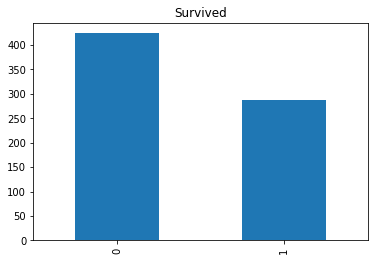

In [21]:
#Visualization of data
import matplotlib.pyplot as plt

#To see, how much has survived and how many are not
titanic_train['Survived'].value_counts().plot(kind='bar')
plt.title("Survived")


Text(0.5, 1.0, 'Age group survival')

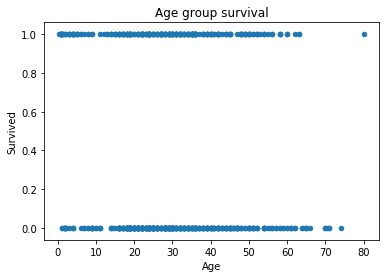

In [22]:
#To check for age groups survival(if any certain age group survived or died)
titanic_train.plot(kind='scatter', x='Age', y='Survived')
plt.title("Age group survival")

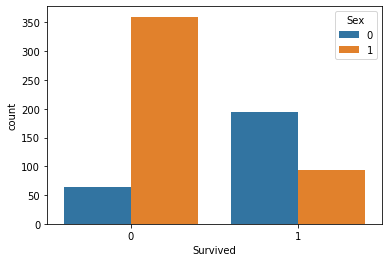

In [23]:
sns.countplot(x='Survived', hue='Sex', data=titanic_train)

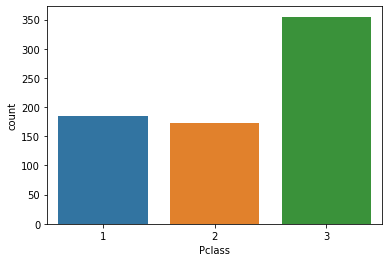

In [24]:
sns.countplot(x='Pclass', data=titanic_train)

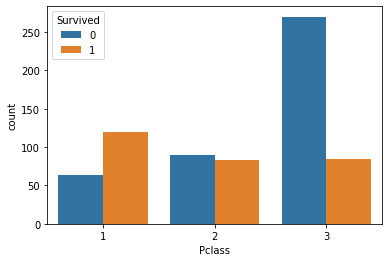

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_train)

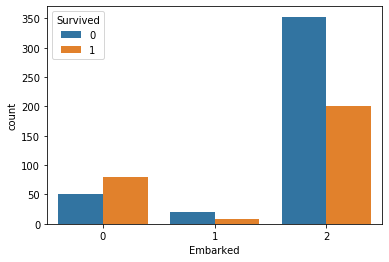

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_train)

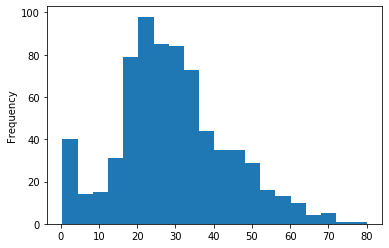

In [27]:
titanic_train['Age'].plot.hist(bins=20)

Text(0.5, 1.0, 'Age vs Passenger Class')

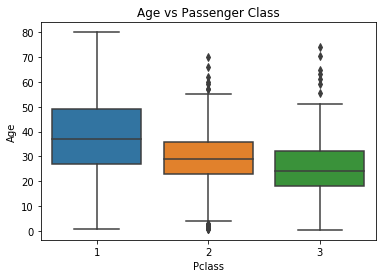

In [28]:
sns.boxplot(x='Pclass', y='Age', data=titanic_train).set_title("Age vs Passenger Class")

In [29]:
correlation1 = titanic_train.corr(method ='pearson')
correlation1.style.background_gradient(cmap='coolwarm')
correlation1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029526,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655,-0.001836
Survived,0.029526,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.035609,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.024674,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,0.033681,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.082704,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,-0.011672,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.009655,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.001836,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


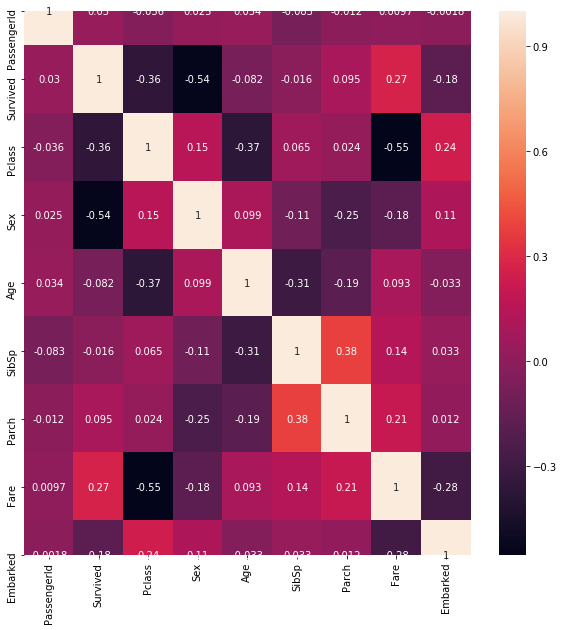

In [30]:
plt.figure(figsize=(10, 10))

sns.heatmap(titanic_train.corr(), annot=True)

Train the Model

In [31]:
X=titanic_train.drop('Survived', axis=1)
y=titanic_train['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [33]:
#To scale up the data
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()
X_train_scale=sc.fit_transform(X_train)
X_test_scale=sc.transform(X_test)
titanic_test_scale=sc.transform(titanic_test)

In [35]:
#Logistic Regression

log_model=LogisticRegression()

In [36]:
log_model.fit(X_train_scale,y_train)

C:\Users\pitambarmishra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred=log_model.predict(X_test_scale)

In [38]:
#To verify the model
from sklearn.metrics import classification_report

In [39]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.85       106\n           1       0.81      0.71      0.76        72\n\n    accuracy                           0.81       178\n   macro avg       0.81      0.80      0.80       178\nweighted avg       0.81      0.81      0.81       178\n'

In [40]:
#To view the confusion matrix
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, pred)

array([[94, 12],
       [21, 51]], dtype=int64)

In [42]:
#to get the accuracy
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, pred)

0.8146067415730337

In [83]:
#RandomForest Classification
rf_model=RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=5, max_depth=4)

In [84]:
rf_model.fit(X_train_scale,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [85]:
rf_pred=rf_model.predict(X_test_scale)

In [86]:
accuracy_score(y_test, rf_pred)

0.8146067415730337

In [48]:
#KNeighbor Classifier

In [87]:
kn_model=KNeighborsClassifier(n_neighbors=10)

In [88]:
kn_model.fit(X_train_scale,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [89]:
kn_pred=kn_model.predict(X_test_scale)

In [90]:
accuracy_score(y_test, kn_pred)

0.8314606741573034

In [53]:
# To apply the model on Titanic Test Data to predict if the passengers survived or not for RandomForest algorithm

In [54]:
titanic_test_scale=sc.transform(titanic_test)
rf_pred_test=rf_model.predict(titanic_test_scale)


In [55]:
rf_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
testId=titanic_test['PassengerId']
ansdf=pd.DataFrame({'PassengerId':testId, 'Survived':rf_pred_test} )

In [62]:
ansdf.to_csv('Predicted_Dataframe.csv', index=False)